In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Importar regresión lineal
from sklearn.preprocessing import PolynomialFeatures  # Para crear características polinomiales
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [120]:
# Cargar conjuntos de características
X_train = pd.read_csv("Data/processed/X_train.csv")
X_test = pd.read_csv("Data/processed/X_test.csv")

# Cargar conjuntos de la variable objetivo
y_train = pd.read_csv("Data/processed/y_train.csv")
y_test = pd.read_csv("Data/processed/y_test.csv")

In [121]:
print("Conjunto de entrenamiento (X_train) dimensiones:", X_train.shape)
print("Conjunto de prueba (X_test) dimensiones:", X_test.shape)
print("Variable objetivo entrenamiento (y_train) dimensiones:", y_train.shape)
print("Variable objetivo prueba (y_test) dimensiones:", y_test.shape)

Conjunto de entrenamiento (X_train) dimensiones: (758, 16)
Conjunto de prueba (X_test) dimensiones: (190, 16)
Variable objetivo entrenamiento (y_train) dimensiones: (758, 1)
Variable objetivo prueba (y_test) dimensiones: (190, 1)


In [122]:
X_train.head()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Gender_Male,Workout_Type_HIIT,Workout_Type_Strength,Workout_Type_Yoga
0,-1.698893,0.648468,1.624861,-1.639258,-0.332459,1.335052,1.352098,-2.090210,1.455967,0.743295,3,-0.209108,True,True,False,False
1,0.272414,-0.677216,0.136465,1.312192,-0.192966,-1.395960,1.527098,-1.370923,0.122330,1.839092,3,-0.790411,False,False,False,True
2,-1.123928,2.205322,0.841495,-0.076726,-1.657634,-1.532510,-0.631235,-0.427859,-0.211079,-0.352502,2,1.666984,True,False,False,False
3,0.354552,-0.247902,-1.586940,-0.597570,-0.471951,0.788850,0.477098,0.499221,-0.044375,0.743295,2,0.717672,False,False,False,True
4,-1.123928,1.469355,1.233178,-0.510763,0.853224,0.652299,0.243765,-0.571716,-0.544488,-0.352502,2,0.720677,True,False,False,False


In [123]:
y_train.head()

,Calories_Burned
0,1315.0
1,1129.0
2,686.0
3,875.0
4,1150.0


In [124]:
# Convertir columnas booleanas a enteros
bool_columns = ['Gender_Male', 'Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga']
X_train[bool_columns] = X_train[bool_columns].astype(int)
X_test[bool_columns] = X_test[bool_columns].astype(int)

In [125]:
# Convertir DataFrames a arrays NumPy
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values.flatten()
y_test = y_test.values.flatten()

In [126]:
# Crear características polinomiales de segundo grado (puedes cambiar el grado a más alto si lo deseas)
poly = PolynomialFeatures(degree=2)  # degree=2 para un polinomio de segundo grado
X_train_poly = poly.fit_transform(X_train)  # Transformar las características de entrenamiento
X_test_poly = poly.transform(X_test)  # Transformar las características de prueba

# Inicializar el modelo de regresión lineal
regressor = LinearRegression()

# Ajustar el modelo de regresión lineal con las características polinomiales
regressor.fit(X_train_poly, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = regressor.predict(X_test_poly)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [127]:
print(f'Pérdida (MSE) en el conjunto de prueba: {mse:.4f}')
print(f'Error Absoluto Medio (MAE) en el conjunto de prueba: {mae:.4f}')
print(f'Coeficiente de Determinación (R²) en el conjunto de prueba: {r2:.4f}')

Pérdida (MSE) en el conjunto de prueba: 1312.6444
Error Absoluto Medio (MAE) en el conjunto de prueba: 29.3304
Coeficiente de Determinación (R²) en el conjunto de prueba: 0.9833


In [128]:
# Comparar los valores reales y predichos
comparison = pd.DataFrame({'Real': y_test, 'Predicho': y_pred})
print(comparison.head(10))

     Real    Predicho
0   354.0   355.46875
1   636.0   585.68750
2   678.0   638.87500
3  1688.0  1656.28125
4   962.0   992.06250
5   695.0   707.18750
6   813.0   778.06250
7   804.0   775.06250
8   598.0   574.81250
9  1163.0  1207.03125


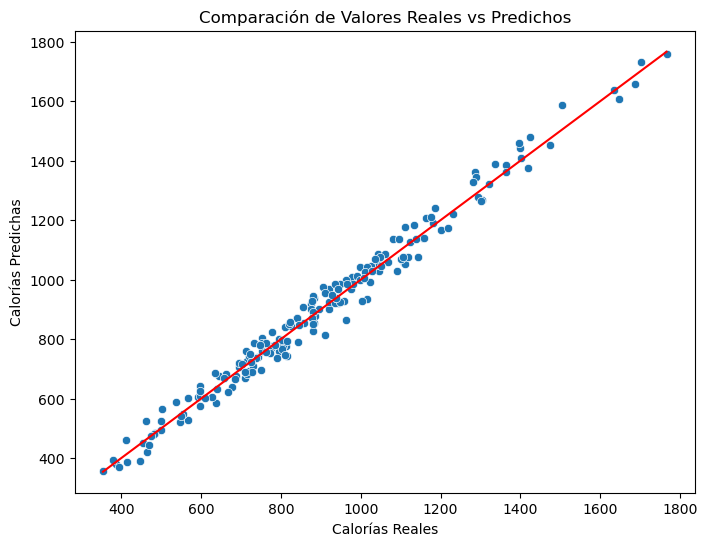

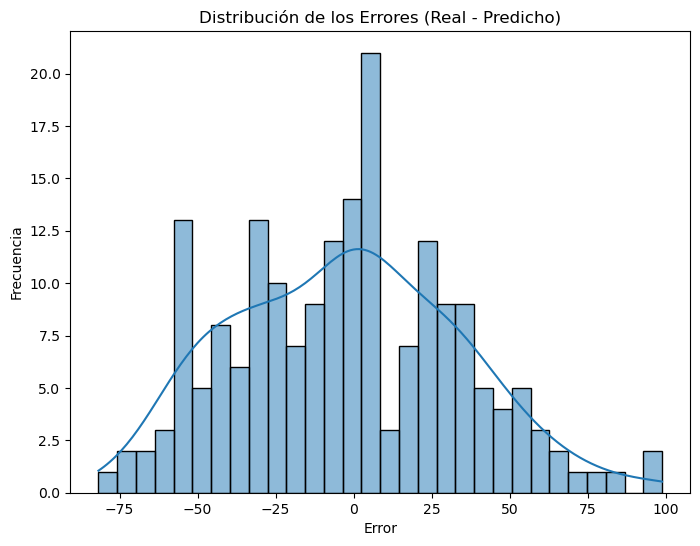

In [129]:
# Gráfico de dispersión Real vs Predicho
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Real', y='Predicho', data=comparison)
plt.title('Comparación de Valores Reales vs Predichos')
plt.xlabel('Calorías Reales')
plt.ylabel('Calorías Predichas')
plt.plot([comparison['Real'].min(), comparison['Real'].max()], 
         [comparison['Real'].min(), comparison['Real'].max()], 
         color='red')  # Línea de referencia
plt.show()

# Histograma de errores
plt.figure(figsize=(8, 6))
sns.histplot(comparison['Real'] - comparison['Predicho'], bins=30, kde=True)
plt.title('Distribución de los Errores (Real - Predicho)')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()

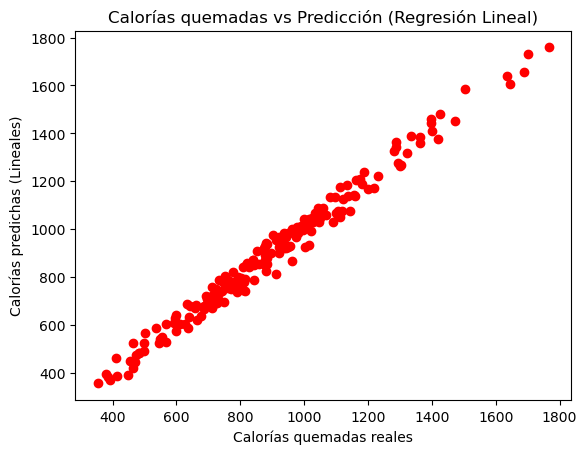

In [130]:
# Visualizar los resultados de la regresión lineal
plt.scatter(y_test, y_pred, color="red")
plt.title("Calorías quemadas vs Predicción (Regresión Lineal)")
plt.xlabel("Calorías quemadas reales")
plt.ylabel("Calorías predichas (Lineales)")
plt.show()

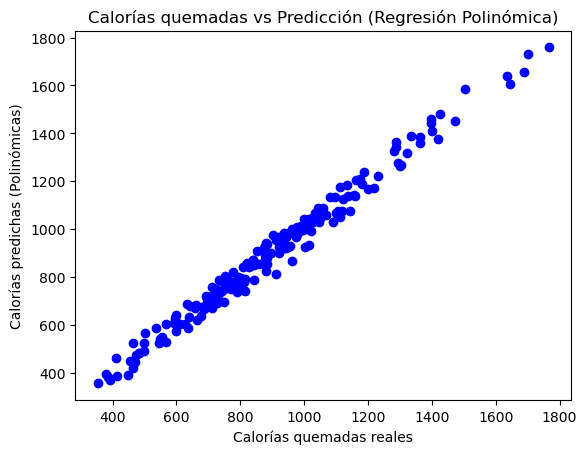

In [131]:
# Visualizar los resultados de la regresión polinómica
plt.scatter(y_test, y_pred, color="blue")
plt.title("Calorías quemadas vs Predicción (Regresión Polinómica)")
plt.xlabel("Calorías quemadas reales")
plt.ylabel("Calorías predichas (Polinómicas)")
plt.show()